In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__  # for the record
import mplfinance as mpf
mpf.__version__ # for the record

'1.1.2'

'0.12.7a5'

---

# Hollow Candles Experiments

### Later we will make this a tutorial explaining what hollow candles are and how to use them.

---

### There is also some code below<br> prototyping a function<br>to dump a style made with &nbsp; `mpf.make_mpf_style()`<br><br> into a file that can then be installed into &nbsp; `mplfinance/src/mplfinance/_style_data/`<br><br> and used as one of mplfinance's built-in styles.

---
---



In [3]:
df = pd.read_csv('data/yahoofinance-SPY-20200901-20210113.csv',index_col=0,parse_dates=True)
df.shape
df.head(3)
df.tail(3)

(92, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-01,350.209991,352.709991,349.239990,352.600006,349.703522,54999300
2020-09-02,354.670013,358.750000,353.429993,357.700012,354.761627,69540000
2020-09-03,355.869995,356.380005,342.589996,345.390015,342.552765,148011100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-08,380.589996,381.489990,377.100006,381.260010,381.260010,71677200
2021-01-11,377.850006,380.579987,377.720001,378.690002,378.690002,51176700
2021-01-12,378.890015,379.859985,376.359985,378.769989,378.769989,52445000


In [4]:
pmax = max(df['High'])
pmin = min(df['Low' ])
offset = 0.06 * (pmax - pmin)

marks = df[['High','Low']].copy()

marks['above'] = [float('nan')]*len(df)
marks['below'] = [float('nan')]*len(df)
dt1 = '11/9/2020'
dt2 = '12/21/2020'
marks.loc[dt1,'above'] = df['High'][dt1]+offset
marks.loc[dt1,'below'] = df['Low' ][dt1]-offset
marks.loc[dt2,'above'] = df['High'][dt2]+offset
marks.loc[dt2,'below'] = df['Low' ][dt2]-offset

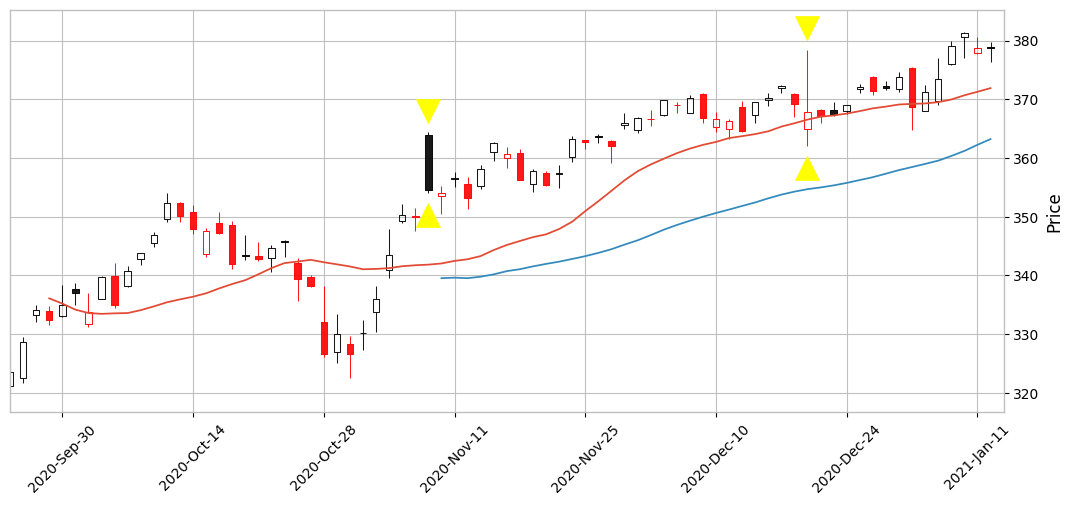

In [5]:
ap = [ 
    mpf.make_addplot(marks['above'],type='scatter',marker='v',color='yellow',markersize=300),
    mpf.make_addplot(marks['below'],type='scatter',marker='^',color='yellow',markersize=300)
]
mpf.plot(df,type='hollow_candle',style='checkers',addplot=ap,
         mav=(20,50),figratio=(12,5),xlim=(16,len(df)))

---
- Notice November 9th (the tall solid black candle) 
  - on that date **`Close < Open`** (see data in next cell)
  - the candle is **FILLED** (*not* hollow) because **`Close < Open`**
  - the candle is **BLACK** (*not* red) because **`Close > Previous Close`**

In [6]:
df.loc['11/6/2020':'11/9/2020',['Open','High','Low','Close']]

,Open,High,Low,Close
Date,,,,
2020-11-06,349.929993,351.510010,347.649994,350.160004
2020-11-09,363.970001,364.380005,354.059998,354.559998


---
- Notice December 21st (the red outlined candle with a white center, and very long wicks) 
  - on that date **`Close > Open`** (see data in next cell)
  - the candle is **HOLLOW** (**white center**) because **`Close > Open`**
  - the candle is **RED** because **`Close < Previous Close`**

In [7]:
df.loc['12/17/2020':'12/21/2020',['Open','High','Low','Close']]

,Open,High,Low,Close
Date,,,,
2020-12-17,371.940002,372.459991,371.049988,372.239990
2020-12-18,370.970001,371.149994,367.019989,369.179993
2020-12-21,364.970001,378.459991,362.029999,367.859985


---
---

In [8]:
df = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
df.shape
df.head(3)
df.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


---

#### Using this dataframe, we can of course plot a basic ohlc or candlestick plot:



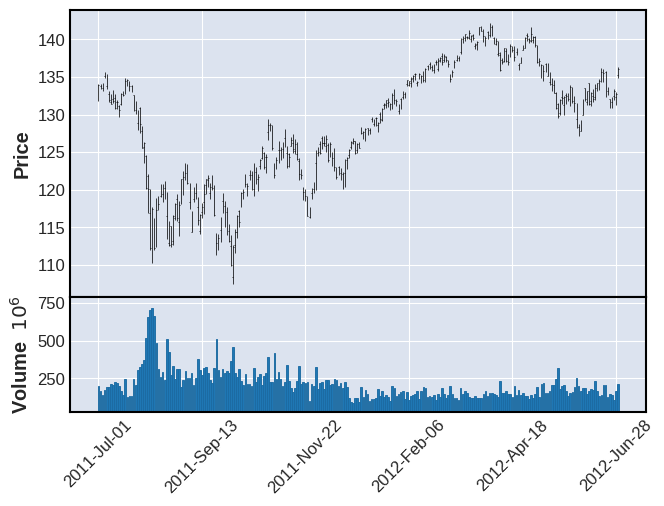

In [9]:
mpf.plot(df,volume=True)

In [10]:
tdf = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True).loc['08-15-2011':'10-30-2011',:]

In [11]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

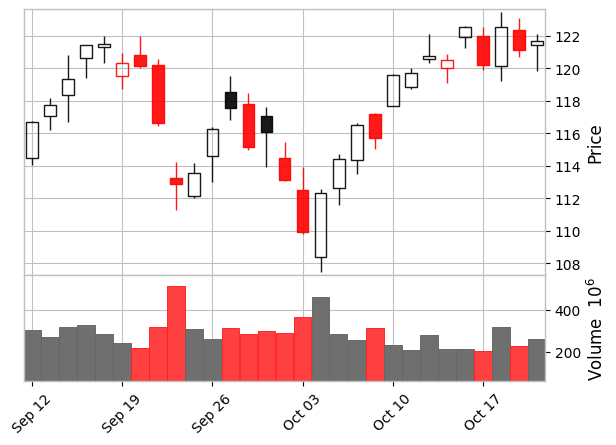

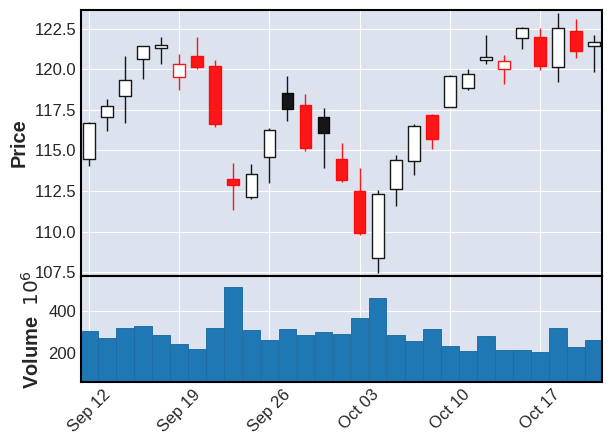

In [12]:
mpf.plot(tdf.loc['09-10-2011':'10-20-2011'],type='hollow_candle',volume=True,style='checkers',tight_layout=True,figscale=0.75)
mpf.plot(tdf.loc['09-10-2011':'10-20-2011'],type='hollow_candle',volume=True,style='kenan',tight_layout=True,figscale=0.75)

In [13]:
tdf.loc['09-10-2011':'10-20-2011'][['Open','Close']]

,Open,Close
Date,,
2011-09-12,114.470001,116.669998
2011-09-13,117.050003,117.739998
2011-09-14,118.339996,119.370003
2011-09-15,120.650002,121.430000
2011-09-16,121.290001,121.519997
2011-09-19,119.529999,120.309998
2011-09-20,120.820000,120.169998
2011-09-21,120.230003,116.629997
2011-09-22,113.250000,112.860001


In [14]:
df = pd.read_csv('data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)

In [15]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

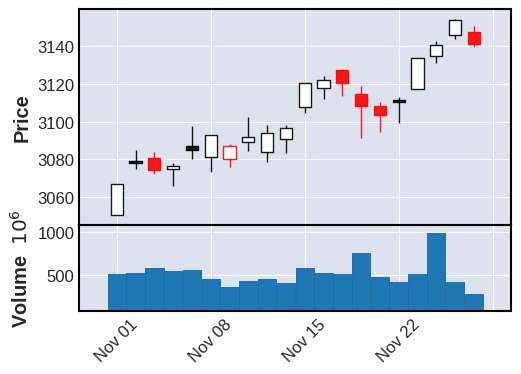

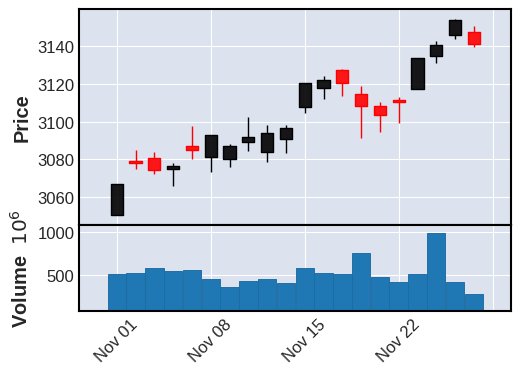

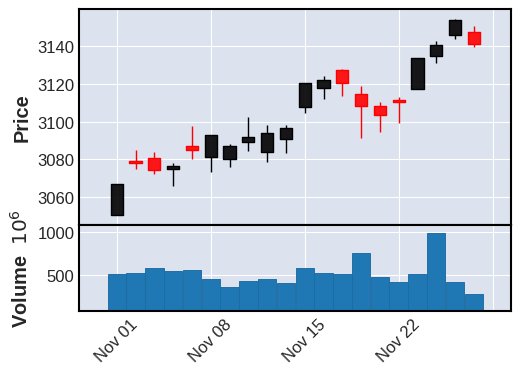

In [16]:
updn = dict(up='k',down='r')
#m = mpf.make_marketcolors(base_mpf_style='default',up='k',down='r',hollow='w',wick=dict(up='k',down='r'),
#                          edge=dict(up='k',down='r'))
m = mpf.make_marketcolors(base_mpf_style='default',**updn,wick=updn,edge=updn,hollow='w')
s = mpf.make_mpf_style(base_mpf_style='default',marketcolors=m,style_name='kenan')

mpf.plot(df,type='hollow_candle',volume=True,style=s,figscale=0.75)

mpf.plot(df,type='candle'       ,style='kenan',volume=True,figscale=0.75)
mpf.plot(df,type='candle'       ,style=s,volume=True,figscale=0.75)

import pprint
#pp = pprint.PrettyPrinter(indent=4)
#pp.pprint(s)

pp   = pprint.PrettyPrinter(indent=4,sort_dicts=False)
strl = pp.pformat(s).splitlines()
f    = open('kenan.py', 'w')
print('style = '+strl[0],file=f)    
for line in strl[1:]:
    print('        '+line,file=f)
f.close()

In [17]:
!cat kenan.py

style = {   'style_name': 'kenan',
            'base_mpl_style': 'seaborn-darkgrid',
            'marketcolors': {   'candle': {'up': 'k', 'down': 'r'},
                                'edge': {'up': 'k', 'down': 'r'},
                                'wick': {'up': 'k', 'down': 'r'},
                                'ohlc': {'up': 'k', 'down': 'k'},
                                'volume': {'up': '#1f77b4', 'down': '#1f77b4'},
                                'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'},
                                'vcdopcod': False,
                                'alpha': 0.9,
                                'hollow': 'w'},
            'mavcolors': [   '#40e0d0',
                             '#ff00ff',
                             '#ffd700',
                             '#1f77b4',
                             '#ff7f0e',
                             '#2ca02c',
                             '#e377c2'],
            'y_on_right': False,
            'gridcolor': None,

In [18]:
pp   = pprint.PrettyPrinter(indent=4,sort_dicts=False,compact=True)
strl = pp.pformat(s).splitlines()
#strl[0]
#strl[0].replace('{','dict(',1).replace("'","",2).replace(':',' =',1)
print('style = '+strl[0].replace('{','dict(',1).replace("'","",2).replace(':',' =',1))
for line in strl[1:-1]:
    if "'" in line[0:5]:
        print('            '+line.replace("'","",2).replace(':',' =',1))
    else:
        print('            '+line)
line = strl[-1]
if "'" in line[0:5]:
    line = line.replace("'","",2).replace(':',' =',1)[::-1]
else:
    line = line[::-1]
print('            '+line.replace('}',')',1)[::-1])
#f.close()

method = 'mpf.write_style_file(s,"kenan.py")'
print('\n',method,'\n')

style = dict(   style_name = 'kenan',
                base_mpl_style = 'seaborn-darkgrid',
                marketcolors = {   'candle': {'up': 'k', 'down': 'r'},
                                    'edge': {'up': 'k', 'down': 'r'},
                                    'wick': {'up': 'k', 'down': 'r'},
                                    'ohlc': {'up': 'k', 'down': 'k'},
                                    'volume': {'up': '#1f77b4', 'down': '#1f77b4'},
                                    'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'},
                                    'vcdopcod': False,
                                    'alpha': 0.9,
                                    'hollow': 'w'},
                mavcolors = [   '#40e0d0', '#ff00ff', '#ffd700', '#1f77b4', '#ff7f0e',
                                 '#2ca02c', '#e377c2'],
                y_on_right = False,
                gridcolor = None,
                gridstyle = None,
                facecolor = '#DCE3EF',
                r

In [19]:
style = dict(   style_name = 'kenan',
                base_mpl_style = 'seaborn-darkgrid',
                marketcolors = {   'candle': {'up': 'k', 'down': 'r'},
                                    'edge': {'up': 'k', 'down': 'r'},
                                    'wick': {'up': 'k', 'down': 'r'},
                                    'ohlc': {'up': 'k', 'down': 'k'},
                                    'volume': {'up': '#1f77b4', 'down': '#1f77b4'},
                                    'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'},
                                    'vcdopcod': False,
                                    'alpha': 0.9,
                                    'hollow': 'w'},
                mavcolors = [   '#40e0d0', '#ff00ff', '#ffd700', '#1f77b4', '#ff7f0e',
                                 '#2ca02c', '#e377c2'],
                y_on_right = False,
                gridcolor = None,
                gridstyle = None,
                facecolor = '#DCE3EF',
                rc = [   ('axes.edgecolor', 'black'), ('axes.linewidth', 1.5),
                          ('axes.labelsize', 'large'), ('axes.labelweight', 'semibold'),
                          ('lines.linewidth', 2.0), ('font.weight', 'medium'),
                          ('font.size', 12.0)],
                base_mpf_style = 'default')

In [20]:
style

{'style_name': 'kenan',
 'base_mpl_style': 'seaborn-darkgrid',
 'marketcolors': {'candle': {'up': 'k', 'down': 'r'},
  'edge': {'up': 'k', 'down': 'r'},
  'wick': {'up': 'k', 'down': 'r'},
  'ohlc': {'up': 'k', 'down': 'k'},
  'volume': {'up': '#1f77b4', 'down': '#1f77b4'},
  'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'},
  'vcdopcod': False,
  'alpha': 0.9,
  'hollow': 'w'},
 'mavcolors': ['#40e0d0',
  '#ff00ff',
  '#ffd700',
  '#1f77b4',
  '#ff7f0e',
  '#2ca02c',
  '#e377c2'],
 'y_on_right': False,
 'gridcolor': None,
 'gridstyle': None,
 'facecolor': '#DCE3EF',
 'rc': [('axes.edgecolor', 'black'),
  ('axes.linewidth', 1.5),
  ('axes.labelsize', 'large'),
  ('axes.labelweight', 'semibold'),
  ('lines.linewidth', 2.0),
  ('font.weight', 'medium'),
  ('font.size', 12.0)],
 'base_mpf_style': 'default'}

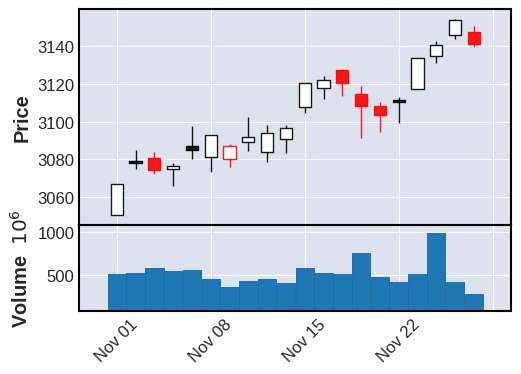

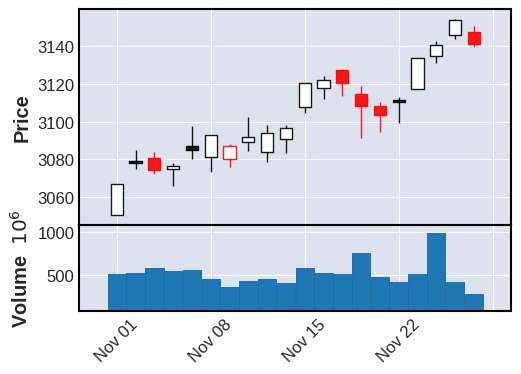

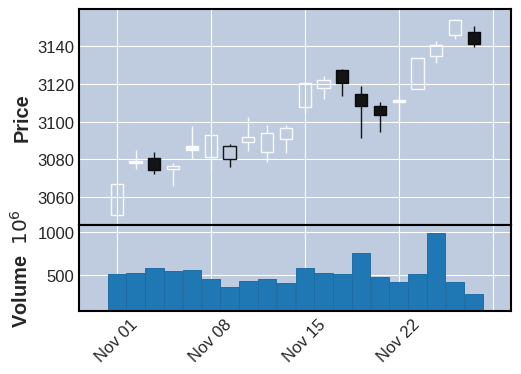

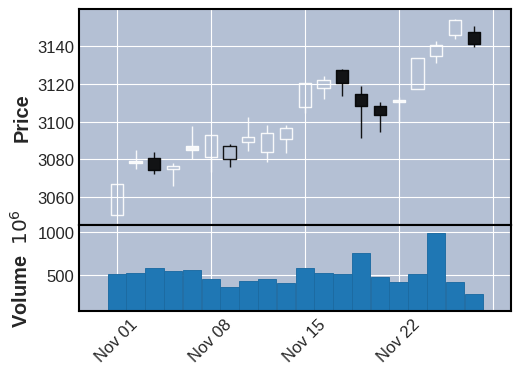

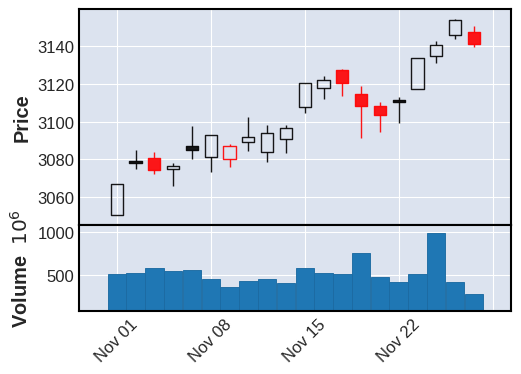

In [21]:
#mpf.plot(tdf,type='renko',volume=True,style='blueskies')
#s = mpf.make_mpf_style(base_mpf_style='default',facecolor='#b4c0d4')
mpf.plot(df,type='hollow_candle',style='kenan',volume=True,figscale=0.75)#,style=s)

m = mpf.make_marketcolors(base_mpf_style='default',up='k',down='r',hollow='w',wick=dict(up='k',down='r'))
s = mpf.make_mpf_style(base_mpf_style='default',marketcolors=m)
mpf.plot(df,type='hollow_candle',volume=True,style=s,figscale=0.75)

m = mpf.make_marketcolors(base_mpf_style='default',wick=dict(up='w',down='k'))
s = mpf.make_mpf_style(base_mpf_style='default',marketcolors=m,facecolor='#bfcbdf')
mpf.plot(df,type='hollow_candle',volume=True,style=s,figscale=0.75,)

m = mpf.make_marketcolors(base_mpf_style='default',wick=dict(up='w',down='k'))
s = mpf.make_mpf_style(base_mpf_style='default',marketcolors=m,facecolor='#b4c0d4')
mpf.plot(df,type='hollow_candle',volume=True,style=s,figscale=0.75,)

m = mpf.make_marketcolors(base_mpf_style='checkers',volume={'up':'#1f77b4', 'down':'#1f77b4'})
s = mpf.make_mpf_style(base_mpf_style='default',marketcolors=m)
mpf.plot(df,type='hollow_candle',volume=True,style=s,figscale=0.75)

In [22]:
#tdf

In [23]:
m = mpf.make_marketcolors(base_mpf_style='checkers',volume={'up':'#1f77b4', 'down':'#1f77b4'})
s = mpf.make_mpf_style(base_mpf_style='default',marketcolors=m)

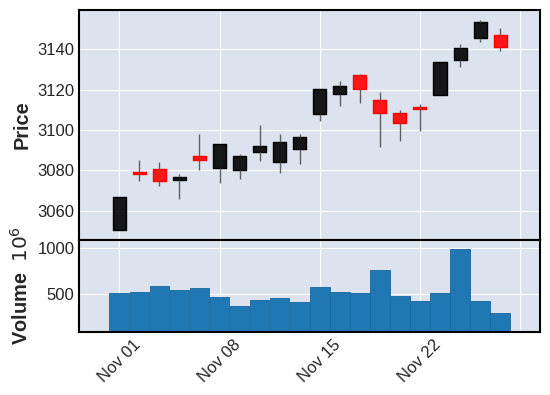

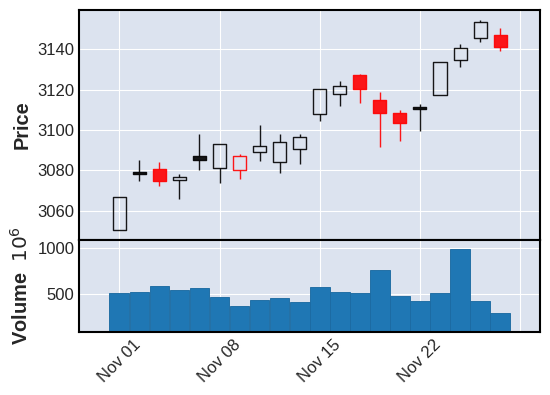

In [24]:
mpf.plot(df,type='candle'       ,volume=True,style=s,figscale=0.8)
mpf.plot(df,type='hollow_candle',volume=True,style=s,figscale=0.8)

In [25]:
df[['Open','Close']]

,Open,Close
Date,,
2019-11-01,3050.72,3066.91
2019-11-04,3078.96,3078.27
2019-11-05,3080.80,3074.62
2019-11-06,3075.10,3076.78
2019-11-07,3087.02,3085.18
2019-11-08,3081.25,3093.08
2019-11-11,3080.33,3087.01
2019-11-12,3089.28,3091.84
2019-11-13,3084.18,3094.04
